<a href="https://colab.research.google.com/github/dohaalnabahin/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Prediction of Product Sales

- Author: Doha Alnabahin

## Project Overview

## Load and Inspect Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fpath = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Item_Weight:**

 Contains only 7060 values ​​(meaning you have 1463 missing values).

**Outlet_Size:**

Contains only 6113 values ​​(meaning you have 2410 missing values).

**The remaining columns are complete and correct.**

## Clean Data

In [ ]:
# 1) How many rows and columns?
df.shape


(8523, 12)

 There are 607 rows and 12 columns

In [ ]:
# 2) What are the datatypes of each variable?
df.dtypes


,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


**Object :**  

Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type

**float64 :**

Item_Weight , Item_Visibility , Item_MRP , Item_Outlet_Sales

**int64 :**

Outlet_Establishment_Year


In [ ]:
# 3) Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

np.int64(0)

**0:** This means the number of duplicate rows is (zero).

In [ ]:
# 4) Identify missing values.
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
# Identifying % of missing data
df.isna().sum() / len(df) * 100

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


There are 1463 missing values in the **Item_Weight** column. (17.1%)

There are 2410 missing values in the **Outlet_Size** in usd column. (28.27%)

**The remaining columns** have a 0.000000 percentage, which is excellent

because they are complete and do not require cleaning up any missing values.

In [ ]:
df['Item_Weight'].value_counts()

,count
Item_Weight,
12.150,86
17.600,82
13.650,77
11.800,76
15.100,68
...,...
8.920,2
6.520,1
9.420,1


<Axes: xlabel='Item_Weight', ylabel='Count'>

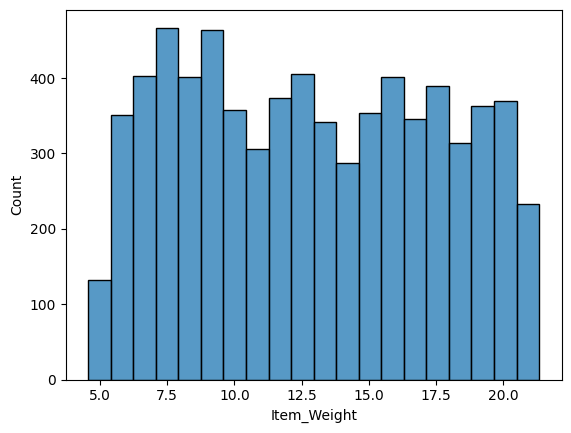

In [ ]:
sns.histplot(df['Item_Weight'])

This chart shows that most products weigh between 5 and 21 kilograms, with products weighing around 7 and 9 kilograms being the most frequent (with more than 450 products each), while very light products (less than 5 kg) are the least present in the data.


**We used the Mode to fill the missing weights because it preserved the original distribution of the data. Testing showed that the histogram remained unchanged, ensuring that the imputation didn't introduce any bias.**

In [ ]:
# 5) Address the missing values by using a placeholder value.
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mode()[0])

In [ ]:
df['Item_Weight'].value_counts()

,count
Item_Weight,
12.150,1549
17.600,82
13.650,77
11.800,76
15.100,68
...,...
8.920,2
6.520,1
9.420,1


In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


<Axes: xlabel='Outlet_Size', ylabel='Count'>

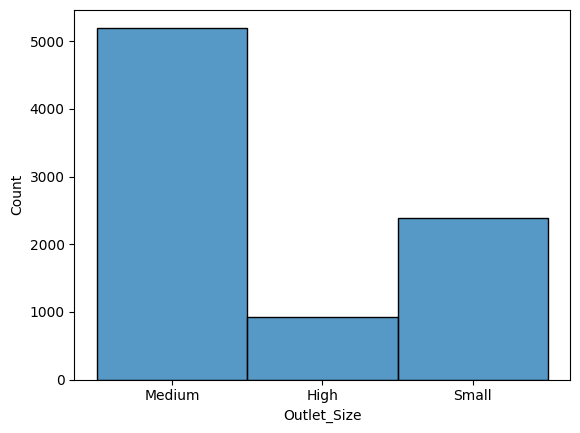

In [ ]:
sns.histplot(df['Outlet_Size'])

The data shows that most stores are medium and small in size (more than 2400 each), while large stores are significantly less frequent (less than 1000).

**WWe filled the missing store sizes using the Mode (the most frequent size), as it is the most logical way to maintain the existing store distribution**

In [ ]:
# 5) Address the missing values by using a placeholder value.
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])


In [ ]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,5203
Small,2388
High,932


In [ ]:
# 6) Confirm that there are no missing values after addressing them.
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Column: Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64
------------------------------
Column: Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
------------------------------
Column: Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
------------------------------
Column: Outle

In [ ]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
#  7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})

df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df = df.rename(columns={
    'Item_Identifier': 'ID',
    'Item_Weight': 'Weight',
    'Item_Fat_Content': 'Fat_Level',
    'Item_Visibility': 'Visibility',
    'Item_Type': 'Category',
    'Item_MRP': 'Max_Price',
    'Outlet_Identifier': 'Store_ID',
    'Outlet_Establishment_Year': 'Store_Age',
    'Outlet_Size': 'Store_Size',
    'Outlet_Location_Type': 'Area_Type',
    'Outlet_Type': 'Store_Type',
    'Item_Outlet_Sales': 'Sales'
})

df.head()

,ID,Weight,Fat_Level,Visibility,Category,Max_Price,Store_ID,Store_Age,Store_Size,Area_Type,Store_Type,Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**The data types were successfully matched with the data dictionary, and it was confirmed that all missing values ​​were handled, so all columns now contain 8523 complete values**

In [ ]:
#  8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
df.describe()

,Weight,Visibility,Max_Price,Store_Age,Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.736176,0.066132,140.992782,1997.831867,2181.288914
std,4.234540,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.150000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Descriptive statistics reveal a highly dispersed sales distribution (Std = 1706), reflecting significant variations in product performance across stores. 75% of products achieve sales below 3101, while the highest value reaches 13086. This wide gap between the 'average' and 'Max' indicates the presence of a limited category of exceptionally performing products (outliers), which drive overall store sales.**

## Exploratory Data Analysis


## Feature Inspection